### Dataset: IMDB 5000 Movie Dataset

### The main focus here is to discover the main factors of a high grossing movie

In [79]:
reset -fs

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.tools.plotting import scatter_matrix
import statsmodels.api as sm
from scipy.stats import norm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', 50)

In [81]:
movies = pd.read_csv('https://raw.githubusercontent.com/sundeepblue/movie_rating_prediction/master/movie_metadata.csv')
movies.columns = [column.lower() for column in movies.columns]
movies.head(2)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0


In [82]:
movies.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4993.000000,5028.000000,4939.000000,5020.000000,5036.000000,4.159000e+03,5.043000e+03,5043.000000,5030.000000,5022.000000,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
mean,140.194272,107.201074,686.509212,645.009761,6560.047061,4.846841e+07,8.366816e+04,9699.063851,1.371173,272.770808,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,121.601675,25.197441,2813.328607,1665.041728,15020.759120,6.845299e+07,1.384853e+05,18163.799124,2.013576,377.982886,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,50.000000,93.000000,7.000000,133.000000,614.000000,5.340988e+06,8.593500e+03,1411.000000,0.000000,65.000000,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,110.000000,103.000000,49.000000,371.500000,988.000000,2.551750e+07,3.435900e+04,3090.000000,1.000000,156.000000,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,195.000000,118.000000,194.500000,636.000000,11000.000000,6.230944e+07,9.630900e+04,13756.500000,2.000000,326.000000,4.500000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000


__Visualizing how many movies are colored and in English__

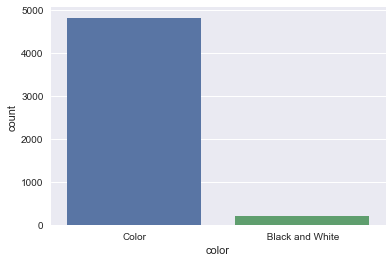

In [83]:
sns.countplot(x="color", data = movies);

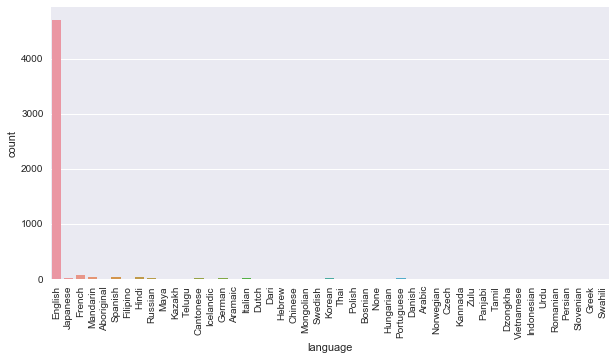

In [84]:
plt.figure(figsize=(10,5))
sns.countplot(x='language', data=movies);
xt = plt.xticks(rotation=90)

### As we expected, colored English movies dominate the dataset. 

### Before getting to data cleaning, let't have a quick thoughts on what features should not be considered as good predictors for revenue. 

### 1. Facebook likes. The data given for actors' facebook likes are incomplete. There are many famous actors do not have facebook account. Therefore, the 3 actors listed in the data might not be the 3 main charactors. Also, the popularity of an actor cannot be simply evaluated by the his/her facebook likes. So facebook_likes are not very good predictors overall.

### 2. color and language. simply because colored English films dominate our dataset.

### 3. movie imdb links and aspect ratio.

In [85]:
col= movies.columns.tolist()
newcol=[]
removeset = ('color',
             'language',
             'actor_1_facebook_likes',
           'actor_2_facebook_likes',
           'actor_3_facebook_likes',
           'actor_1_facebook_likes',
          'director_facebook_likes',
          'cast_total_facebook_likes',
          'movie_imdb_link',
          'aspect_ratio',
          'movie_facebook_likes')
for item in col:
    if item not in removeset:
        newcol.append(item)
# This will be the new columns for data analysis.   
print(newcol)

['director_name', 'num_critic_for_reviews', 'duration', 'actor_2_name', 'gross', 'genres', 'actor_1_name', 'movie_title', 'num_voted_users', 'actor_3_name', 'facenumber_in_poster', 'plot_keywords', 'num_user_for_reviews', 'country', 'content_rating', 'budget', 'title_year', 'imdb_score']


### Data cleaning
### To avoid currency and inflation issues. I decided to do movies that are only made in USA and after the year of 1990.

In [86]:
# Removie duplicates
movies = movies.fillna(movies.median()).drop_duplicates(['movie_title','title_year'])
movies_usa = movies[movies.country == 'USA'][movies.title_year>1990]
# Create a new dataframe sorted by Gross
movies_usa=movies_usa.sort_values(by=['gross'], ascending=False)[newcol]
movies_usa.head(2)

/Users/DL/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  app.launch_new_instance()


,director_name,num_critic_for_reviews,duration,actor_2_name,gross,genres,actor_1_name,movie_title,num_voted_users,actor_3_name,facenumber_in_poster,plot_keywords,num_user_for_reviews,country,content_rating,budget,title_year,imdb_score
0,James Cameron,723.0,178.0,Joel David Moore,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,Wes Studi,0.0,avatar|future|marine|native|paraplegic,3054.0,USA,PG-13,237000000.0,2009.0,7.9
26,James Cameron,315.0,194.0,Kate Winslet,658672302.0,Drama|Romance,Leonardo DiCaprio,Titanic,793059,Gloria Stuart,0.0,artist|love|ship|titanic|wet,2528.0,USA,PG-13,200000000.0,1997.0,7.7


In [87]:
movies_usa.describe()

,num_critic_for_reviews,duration,gross,num_voted_users,facenumber_in_poster,num_user_for_reviews,budget,title_year,imdb_score
count,3272.000000,3272.000000,3.272000e+03,3.272000e+03,3272.000000,3272.000000,3.272000e+03,3272.000000,3272.000000
mean,148.392726,105.366137,5.060053e+07,9.127175e+04,1.468215,291.218215,3.697173e+07,2005.755807,6.289639
std,125.949207,22.711618,6.734087e+07,1.478387e+05,2.156991,398.751653,4.202339e+07,6.275882,1.115963
min,1.000000,7.000000,7.030000e+02,5.000000e+00,0.000000,1.000000,2.180000e+02,1991.000000,1.600000
25%,55.000000,93.000000,1.157213e+07,1.017675e+04,0.000000,73.000000,1.000000e+07,2001.000000,5.700000
50%,118.000000,102.000000,2.551750e+07,4.017650e+04,1.000000,168.500000,2.000000e+07,2006.000000,6.400000
75%,206.000000,116.000000,6.324121e+07,1.078275e+05,2.000000,349.000000,5.000000e+07,2011.000000,7.100000
max,813.000000,330.000000,7.605058e+08,1.689764e+06,43.000000,4667.000000,3.000000e+08,2016.000000,9.300000


In [88]:
movies_usa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3272 entries, 0 to 4607
Data columns (total 18 columns):
director_name             3199 non-null object
num_critic_for_reviews    3272 non-null float64
duration                  3272 non-null float64
actor_2_name              3265 non-null object
gross                     3272 non-null float64
genres                    3272 non-null object
actor_1_name              3268 non-null object
movie_title               3272 non-null object
num_voted_users           3272 non-null int64
actor_3_name              3261 non-null object
facenumber_in_poster      3272 non-null float64
plot_keywords             3182 non-null object
num_user_for_reviews      3272 non-null float64
country                   3272 non-null object
content_rating            3120 non-null object
budget                    3272 non-null float64
title_year                3272 non-null float64
imdb_score                3272 non-null float64
dtypes: float64(8), int64(1), object(9)


### Now let's visualize our targeted features. Are they normally distributed? 

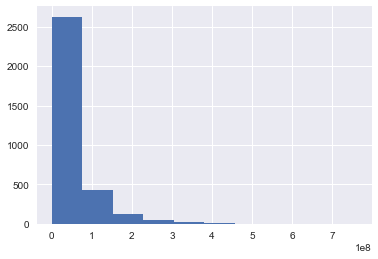

In [89]:
movies_usa['gross'].hist();
# It is very skewed.

### In this case, taking a logarithm of gross should be a good solution.

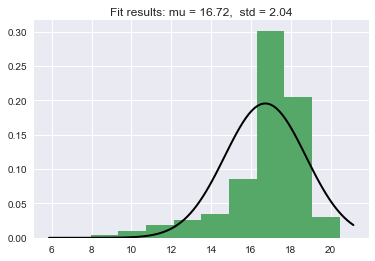

In [90]:
grossing = movies_usa['gross']

# Taking a log on our feature
movies_usa['loggross']=np.log(grossing)
x=movies_usa['loggross']
μ, σ = norm.fit(x)

# plot and try to fit a normal distribution into our plot
plt.hist(x,range=[min(x),max(x)], normed=True)
plt.hist(movies_usa['loggross'], normed=True)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, μ, σ)
plt.plot(x, p, 'k', linewidth=2);
title = "Fit results: mu = {:.2f},  std = {:.2f}".format(μ, σ)
plt.title(title);

### Let's take a look at our independent variables

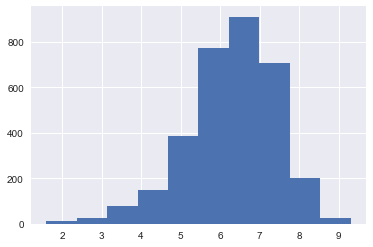

In [91]:
movies_usa.imdb_score.hist();

### Now the plots all seem normal, so we are good to go!

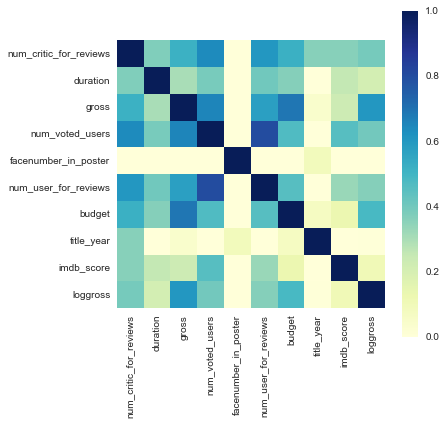

In [92]:
# Take a look at the correlations between features and loggross.
corr = movies_usa.select_dtypes(include=['float64','int64']).corr()
plt.figure(figsize=(6,6))
sns.heatmap(corr,square=True,vmin=0,cmap="YlGnBu");

### we can clearly see the correlation between logbudget and loggross is much darker. So budget could be a good predictor.

### But before going to budget, I will just use imdb_score as a general evaluation of how good the script and actors' acting skill are to predict movie revenue.

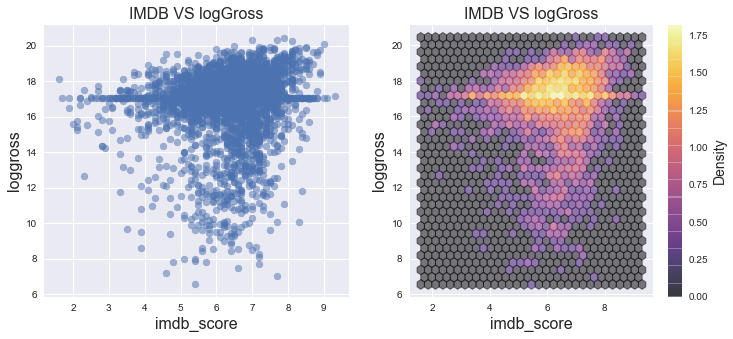

In [93]:
# First, let's visualize.
x = movies_usa['imdb_score']
y = movies_usa['loggross']
f, (ax1, ax2) = plt.subplots(1, 2, figsize = (12,5))

ax1.scatter(x,y,alpha=0.5)
ax1.set_title('IMDB VS logGross',fontsize=16)
ax1.set_xlabel('imdb_score',fontsize=16)
ax1.set_ylabel('loggross',fontsize=16)
hxb=ax2.hexbin(x,y,alpha=0.5,cmap='inferno',bins='log',gridsize=30)
ax2.set_title('IMDB VS logGross',fontsize=16)
ax2.set_xlabel('imdb_score',fontsize=16)
ax2.set_ylabel('loggross',fontsize=16)
cb = f.colorbar(hxb, ax=ax2)
cb.set_label('Density',fontsize=14)

# It looks like a mess and I don't see a linear relation between them. 
# In general, imdb score isn't a good predictor, because many movies in the history 
# with very high scores didn't sell well.

In [94]:
g_score_model = ols("loggross ~ imdb_score", data=movies_usa).fit()
g_score_model.summary()

# As we expected, we received a very low Ajd. r square, which means a linear regression line 
# fits very badly. However, our P-value is significantly low! Let's just keep it in our model.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               loggross   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     38.82
Date:                Fri, 10 Mar 2017   Prob (F-statistic):           5.24e-10
Time:                        21:36:02   Log-Likelihood:                -6953.8
No. Observations:                3272   AIC:                         1.391e+04
Df Residuals:                    3270   BIC:                         1.392e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     15.4746      0.203     76.274      0.000        15.077    15.872
imdb_score     0.1979      0.032      6.231      0.000         0.136     0.260
==============================================================================
Omnibus:                     1127.777   Durbin-Watson:                   0.021
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3494.327
Skew:                          -1.783   Prob(JB):                         0.00
Kurtosis:                       6.593   Cond. No.                         37.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Let's plot budget and loggross

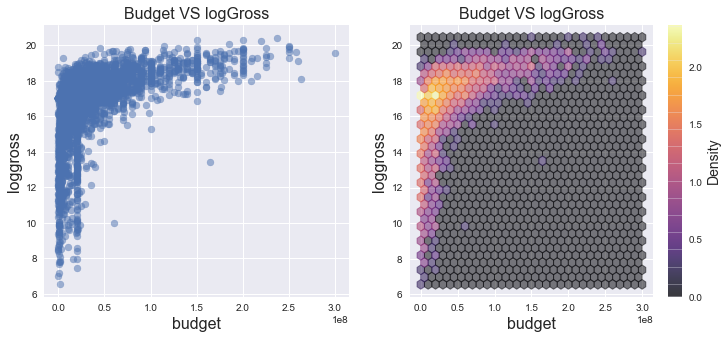

In [95]:
x = movies_usa['budget']
y = movies_usa['loggross']
f, (ax1, ax2) = plt.subplots(1, 2, figsize = (12,5))

ax1.scatter(x,y,alpha=0.5)
ax1.set_title('Budget VS logGross',fontsize=16)
ax1.set_xlabel('budget',fontsize=16)
ax1.set_ylabel('loggross',fontsize=16)
hxb=ax2.hexbin(x,y,alpha=0.5,cmap='inferno',bins='log',gridsize=30)
ax2.set_title('Budget VS logGross',fontsize=16)
ax2.set_xlabel('budget',fontsize=16)
ax2.set_ylabel('loggross',fontsize=16)
cb = f.colorbar(hxb, ax=ax2)
cb.set_label('Density',fontsize=14)

# Not so bad. I can kind of see a linear line fit in.

In [96]:
g_b_model = ols("loggross ~ budget", data=movies_usa).fit()
g_b_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               loggross   R-squared:                       0.237
Model:                            OLS   Adj. R-squared:                  0.237
Method:                 Least Squares   F-statistic:                     1015.
Date:                Fri, 10 Mar 2017   Prob (F-statistic):          3.37e-194
Time:                        21:36:03   Log-Likelihood:                -6530.9
No. Observations:                3272   AIC:                         1.307e+04
Df Residuals:                    3270   BIC:                         1.308e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     15.8463      0.041    382.011      0.000        15.765    15.928
budget      2.361e-08   7.41e-10     31.857      0.000      2.22e-08  2.51e-08
==============================================================================
Omnibus:                     1237.780   Durbin-Watson:                   0.296
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4462.552
Skew:                          -1.898   Prob(JB):                         0.00
Kurtosis:                       7.280   Cond. No.                     7.45e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.45e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Budget should be a big factor!! Because more money means better picture and better actors

### Rating could also be a factor of how a movie sells.

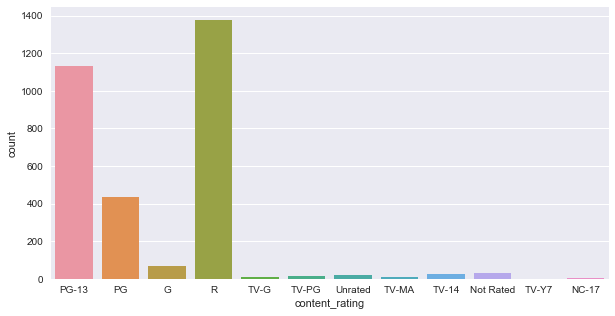

In [97]:
plt.figure(figsize=(10,5))
sns.countplot(x='content_rating', data=movies_usa);

In [98]:
# It seems reasonable to just doing the movies in R and PG-13
movies_rate=movies_usa[movies_usa.content_rating.isin(['R','PG-13'])]
movies_rate.content_rating.value_counts()

R        1377
PG-13    1133
Name: content_rating, dtype: int64

In [117]:
smf.ols(formula="loggross ~ content_rating+budget+imdb_score", data=movies_rate).fit().summary()
# Slight improvement in our model.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               loggross   R-squared:                       0.257
Model:                            OLS   Adj. R-squared:                  0.256
Method:                 Least Squares   F-statistic:                     288.2
Date:                Fri, 10 Mar 2017   Prob (F-statistic):          1.01e-160
Time:                        21:40:36   Log-Likelihood:                -4960.8
No. Observations:                2510   AIC:                             9930.
Df Residuals:                    2506   BIC:                             9953.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------
Intercept              14.9854      0.212     70.827      0.000        14.570    15.400
content_rating[T.R]    -0.4589      0.075     -6.101      0.000        -0.606    -0.311
budget               2.194e-08   9.22e-10     23.799      0.000      2.01e-08  2.37e-08
imdb_score              0.1798      0.034      5.323      0.000         0.114     0.246
==============================================================================
Omnibus:                      872.307   Durbin-Watson:                   0.315
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2837.295
Skew:                          -1.765   Prob(JB):                         0.00
Kurtosis:                       6.830   Cond. No.                     3.34e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.34e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

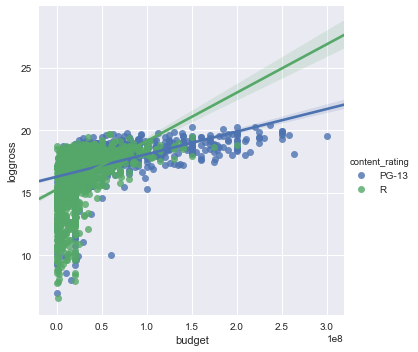

In [118]:
sns.lmplot(x='budget',y='loggross',hue='content_rating',data=movies_rate);

### At last, I want to see will directors and actors have a large impact on movie revenue.

In [119]:
# rank top grossing directors
movies_rate[['director_name','gross']].groupby('director_name').sum().sort_values(by='gross',ascending=False).head(5)

,gross
director_name,
Steven Spielberg,2.280001e+09
Michael Bay,2.195444e+09
Christopher Nolan,1.813228e+09
James Cameron,1.770304e+09
Francis Lawrence,1.358502e+09


In [102]:
movies_rate[['actor_1_name','gross']].groupby('actor_1_name').sum().sort_values(by='gross',ascending=False).head(5)

,gross
actor_1_name,
Will Smith,2.728086e+09
Jennifer Lawrence,2.361766e+09
Robert Downey Jr.,2.330105e+09
Leonardo DiCaprio,2.274953e+09
Chris Hemsworth,2.078950e+09


In [103]:
movies_rate[['actor_2_name','gross']].groupby('actor_2_name').sum().sort_values(by='gross',ascending=False).head(5)

,gross
actor_2_name,
Orlando Bloom,1.558929e+09
James Franco,1.363998e+09
Robert Downey Jr.,1.082271e+09
Morgan Freeman,1.070784e+09
Judy Greer,1.069300e+09


In [104]:
movies_rate[['actor_3_name','gross']].groupby('actor_3_name').sum().sort_values(by='gross',ascending=False).head(5)

,gross
actor_3_name,
Kirsten Dunst,1.218879e+09
Scarlett Johansson,1.135354e+09
Jack Davenport,1.119118e+09
Wes Studi,7.843643e+08
Jon Favreau,7.472223e+08


In [120]:
#add dummy variables to all of them.
movies_df = movies_rate.query("title_year > 1990")
dummies = pd.get_dummies(movies_df['director_name'], prefix="director" )
dummies1 = pd.get_dummies(movies_df['actor_1_name'], prefix="actor1" )
dummies2 = pd.get_dummies(movies_df['actor_2_name'], prefix="actor2" )
dummies3 = pd.get_dummies(movies_df['actor_3_name'], prefix="actor3" )
movies_df = movies_df.join(dummies).join(dummies1).join(dummies2).join(dummies3)
movies_df.head()

,director_name,num_critic_for_reviews,duration,actor_2_name,gross,genres,actor_1_name,movie_title,num_voted_users,actor_3_name,facenumber_in_poster,plot_keywords,num_user_for_reviews,country,content_rating,budget,title_year,imdb_score,loggross,director_A. Raven Cruz,director_Aaron Schneider,director_Aaron Seltzer,director_Abel Ferrara,director_Adam Goldberg,director_Adam Green,...,actor3_Willow Smith,actor3_Winter Ave Zoli,actor3_Wood Harris,actor3_Xander Berkeley,actor3_Xzibit,actor3_Yaphet Kotto,actor3_Yaya DaCosta,actor3_Yetta Gottesman,actor3_Yvette Nicole Brown,actor3_Yvonne Zima,actor3_Zach McGowan,actor3_Zach Mills,actor3_Zach Woods,actor3_Zack Pearlman,actor3_Zack Ward,actor3_Zak Orth,actor3_Zakes Mokae,actor3_Zena Grey,actor3_Zoe Kazan,actor3_Zoe Levin,actor3_Zooey Deschanel,actor3_Zoë Bell,actor3_Zoë Kravitz,actor3_Zoë Poledouris,actor3_Óscar Jaenada
0,James Cameron,723.0,178.0,Joel David Moore,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,Wes Studi,0.0,avatar|future|marine|native|paraplegic,3054.0,USA,PG-13,237000000.0,2009.0,7.9,20.449494,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
26,James Cameron,315.0,194.0,Kate Winslet,658672302.0,Drama|Romance,Leonardo DiCaprio,Titanic,793059,Gloria Stuart,0.0,artist|love|ship|titanic|wet,2528.0,USA,PG-13,200000000.0,1997.0,7.7,20.305737,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
29,Colin Trevorrow,644.0,124.0,Judy Greer,652177271.0,Action|Adventure|Sci-Fi|Thriller,Bryce Dallas Howard,Jurassic World,418214,Omar Sy,0.0,dinosaur|disaster film|experiment gone wrong|j...,1290.0,USA,PG-13,150000000.0,2015.0,7.0,20.295827,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
17,Joss Whedon,703.0,173.0,Robert Downey Jr.,623279547.0,Action|Adventure|Sci-Fi,Chris Hemsworth,The Avengers,995415,Scarlett Johansson,3.0,alien invasion|assassin|battle|iron man|soldier,1722.0,USA,PG-13,220000000.0,2012.0,8.1,20.250506,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
66,Christopher Nolan,645.0,152.0,Heath Ledger,533316061.0,Action|Crime|Drama|Thriller,Christian Bale,The Dark Knight,1676169,Morgan Freeman,0.0,based on comic book|dc comics|psychopath|star ...,4667.0,USA,PG-13,185000000.0,2008.0,9.0,20.094625,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [122]:
movies_df.rename(columns = {'director_Steven Spielberg':'ss'}, inplace=True)
movies_df.rename(columns = {'actor1_Will Smith':'ws'}, inplace=True)
movies_df.rename(columns = {'actor2_Orlando Bloom':'ob'}, inplace=True)
movies_df.rename(columns = {'actor3_Kirsten Dunst':'kd'}, inplace=True)

### Let's see if these directors and actors can bring up a movie revenue

In [124]:
smf.ols(formula="loggross ~ content_rating+budget+imdb_score+ss+ws+ob+kd", data=movies_df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               loggross   R-squared:                       0.258
Model:                            OLS   Adj. R-squared:                  0.256
Method:                 Least Squares   F-statistic:                     124.3
Date:                Fri, 10 Mar 2017   Prob (F-statistic):          3.67e-157
Time:                        21:43:44   Log-Likelihood:                -4958.1
No. Observations:                2510   AIC:                             9932.
Df Residuals:                    2502   BIC:                             9979.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------
Intercept              14.9946      0.212     70.571      0.000        14.578    15.411
content_rating[T.R]    -0.4501      0.075     -5.977      0.000        -0.598    -0.302
budget               2.204e-08   9.54e-10     23.117      0.000      2.02e-08  2.39e-08
imdb_score              0.1765      0.034      5.206      0.000         0.110     0.243
ss                      0.8396      0.471      1.781      0.075        -0.085     1.764
ws                      0.1972      0.419      0.471      0.638        -0.624     1.019
ob                     -0.9318      0.726     -1.283      0.200        -2.356     0.492
kd                     -0.3405      0.882     -0.386      0.699        -2.070     1.389
==============================================================================
Omnibus:                      872.432   Durbin-Watson:                   0.318
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2842.392
Skew:                          -1.764   Prob(JB):                         0.00
Kurtosis:                       6.838   Cond. No.                     1.38e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.38e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Unfortunatly, they are not good predictors

### Lastly, let's complete the tasks given by Brian!

__$H_0$:  The gross income of movies will not be affected by year(I am basically saying that years are bad predictors)__

__$H_a$:  The gross income of movies will be affected by year__


In [126]:
#I took a smaller sample.
movie_year=movies_rate[movies_rate.title_year > 2000]
movie_year.describe()

,num_critic_for_reviews,duration,gross,num_voted_users,facenumber_in_poster,num_user_for_reviews,budget,title_year,imdb_score,loggross
count,1878.000000,1878.000000,1.878000e+03,1.878000e+03,1878.000000,1878.000000,1.878000e+03,1878.000000,1878.000000,1878.000000
mean,189.308839,108.099042,4.975582e+07,1.040463e+05,1.600639,335.662939,3.756911e+07,2008.302982,6.269116,16.645321
std,136.292766,19.435063,6.922289e+07,1.483187e+05,2.377357,419.268737,4.380745e+07,4.419203,1.064747,2.083256
min,1.000000,53.000000,7.030000e+02,6.000000e+00,0.000000,1.000000,3.250000e+03,2001.000000,1.900000,6.555357
25%,91.000000,95.000000,1.010764e+07,1.627575e+04,0.000000,97.000000,1.000000e+07,2005.000000,5.700000,16.128800
50%,161.000000,104.000000,2.551750e+07,5.122800e+04,1.000000,205.000000,2.000000e+07,2008.000000,6.400000,17.054875
75%,258.000000,118.000000,6.062215e+07,1.307472e+05,2.000000,411.000000,4.875000e+07,2012.000000,7.000000,17.920170
max,813.000000,280.000000,7.605058e+08,1.676169e+06,43.000000,4667.000000,3.000000e+08,2016.000000,9.000000,20.449494


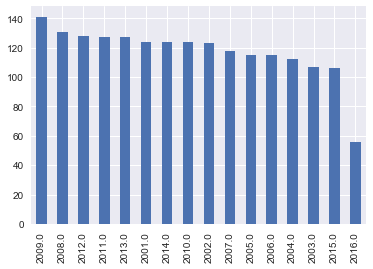

In [110]:
movie_year.title_year.value_counts().plot(kind = 'bar');

In [129]:
movie_year.title_year=movie_year.title_year.astype(str)

/Users/DL/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:2773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [130]:
movie_year.head()

,director_name,num_critic_for_reviews,duration,actor_2_name,gross,genres,actor_1_name,movie_title,num_voted_users,actor_3_name,facenumber_in_poster,plot_keywords,num_user_for_reviews,country,content_rating,budget,title_year,imdb_score,loggross
0,James Cameron,723.0,178.0,Joel David Moore,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,Wes Studi,0.0,avatar|future|marine|native|paraplegic,3054.0,USA,PG-13,237000000.0,2009.0,7.9,20.449494
29,Colin Trevorrow,644.0,124.0,Judy Greer,652177271.0,Action|Adventure|Sci-Fi|Thriller,Bryce Dallas Howard,Jurassic World,418214,Omar Sy,0.0,dinosaur|disaster film|experiment gone wrong|j...,1290.0,USA,PG-13,150000000.0,2015.0,7.0,20.295827
17,Joss Whedon,703.0,173.0,Robert Downey Jr.,623279547.0,Action|Adventure|Sci-Fi,Chris Hemsworth,The Avengers,995415,Scarlett Johansson,3.0,alien invasion|assassin|battle|iron man|soldier,1722.0,USA,PG-13,220000000.0,2012.0,8.1,20.250506
66,Christopher Nolan,645.0,152.0,Heath Ledger,533316061.0,Action|Crime|Drama|Thriller,Christian Bale,The Dark Knight,1676169,Morgan Freeman,0.0,based on comic book|dc comics|psychopath|star ...,4667.0,USA,PG-13,185000000.0,2008.0,9.0,20.094625
8,Joss Whedon,635.0,141.0,Robert Downey Jr.,458991599.0,Action|Adventure|Sci-Fi,Chris Hemsworth,Avengers: Age of Ultron,462669,Scarlett Johansson,4.0,artificial intelligence|based on comic book|ca...,1117.0,USA,PG-13,250000000.0,2015.0,7.5,19.944542


In [131]:
smf.ols(formula="loggross ~ title_year", data=movie_year).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               loggross   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     1.838
Date:                Fri, 10 Mar 2017   Prob (F-statistic):             0.0251
Time:                        21:47:15   Log-Likelihood:                -4028.8
No. Observations:                1878   AIC:                             8090.
Df Residuals:                    1862   BIC:                             8178.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------
Intercept               16.5798      0.186     88.920      0.000        16.214    16.946
title_year[T.2002.0]     0.0487      0.264      0.184      0.854        -0.470     0.567
title_year[T.2003.0]     0.1383      0.274      0.505      0.614        -0.399     0.676
title_year[T.2004.0]     0.0726      0.271      0.268      0.789        -0.458     0.603
title_year[T.2005.0]    -0.1145      0.269     -0.426      0.670        -0.642     0.413
title_year[T.2006.0]    -0.2379      0.269     -0.885      0.376        -0.765     0.289
title_year[T.2007.0]    -0.3714      0.267     -1.391      0.164        -0.895     0.152
title_year[T.2008.0]    -0.0130      0.260     -0.050      0.960        -0.523     0.497
title_year[T.2009.0]    -0.0633      0.256     -0.248      0.804        -0.565     0.438
title_year[T.2010.0]    -0.1126      0.264     -0.427      0.670        -0.630     0.405
title_year[T.2011.0]     0.0471      0.262      0.180      0.857        -0.467     0.561
title_year[T.2012.0]     0.1296      0.262      0.495      0.620        -0.384     0.643
title_year[T.2013.0]     0.4636      0.262      1.769      0.077        -0.050     0.978
title_year[T.2014.0]     0.3006      0.264      1.140      0.254        -0.217     0.818
title_year[T.2015.0]     0.3164      0.275      1.152      0.249        -0.222     0.855
title_year[T.2016.0]     0.9064      0.334      2.711      0.007         0.251     1.562
==============================================================================
Omnibus:                      570.680   Durbin-Watson:                   0.028
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1524.084
Skew:                          -1.610   Prob(JB):                         0.00
Kurtosis:                       6.019   Cond. No.                         16.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### I got an extremely bad model. All of them have bad p-values. Therefore, I failed to reject the null.

### Just for fun!
__ what is the prob of a movie with a imdb_score>8.0 to be directed by Quentin Tarantino__

$$P(QT|score>8.0)$$

First, find out how many movies with a higher than 8.0 are there. 

In [114]:
movie_8=movies[movies['imdb_score']>8.0]

In [115]:
a,b=movie_8.shape
a

249

In [116]:
movie_8.director_name.value_counts().head()

Martin Scorsese      8
Christopher Nolan    7
Steven Spielberg     5
Quentin Tarantino    5
Ridley Scott         4
Name: director_name, dtype: int64

$$P(QT|score>8.0) = 5/249$$